In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SK', 'UK', 'US', 'KR', 'JP', 'CN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

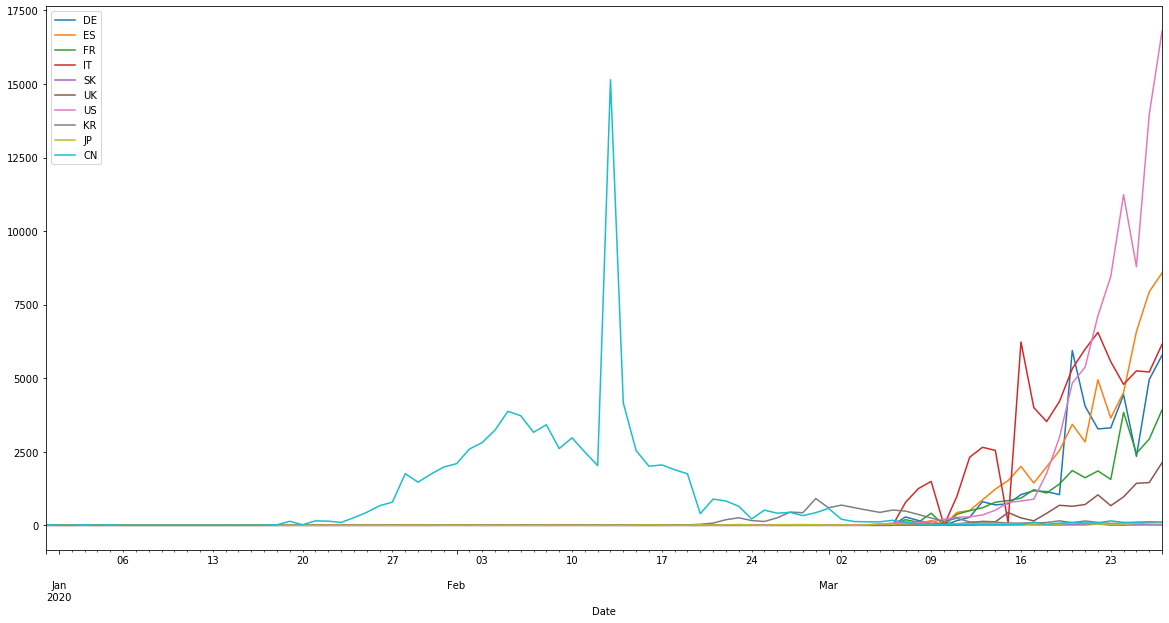

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 10))

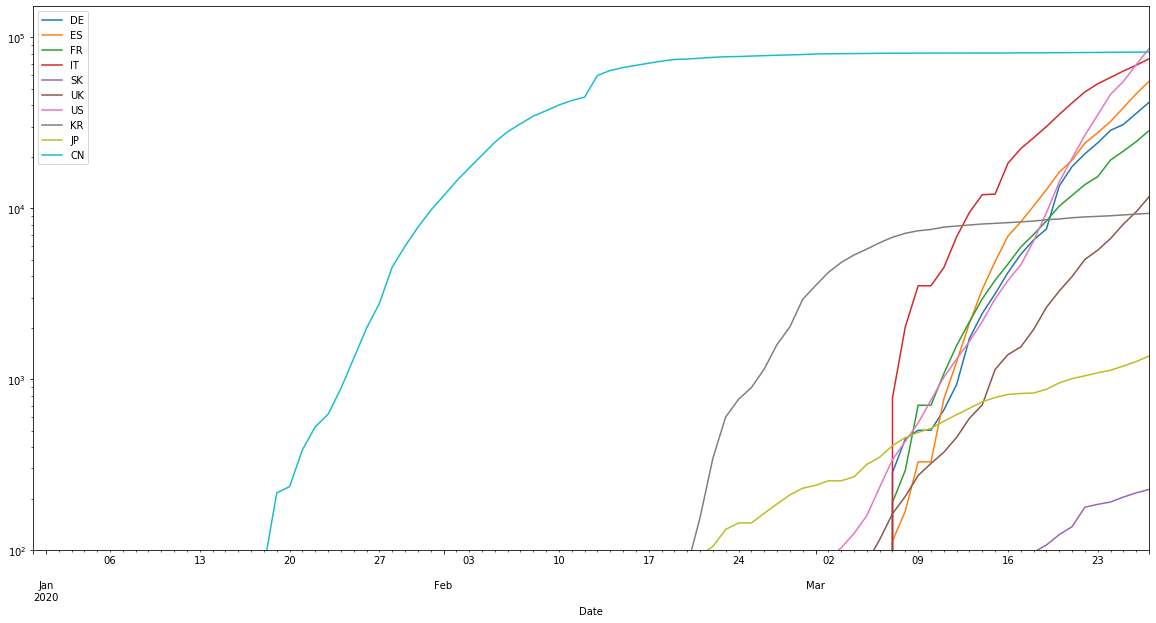

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 10), ylim=(100, None))

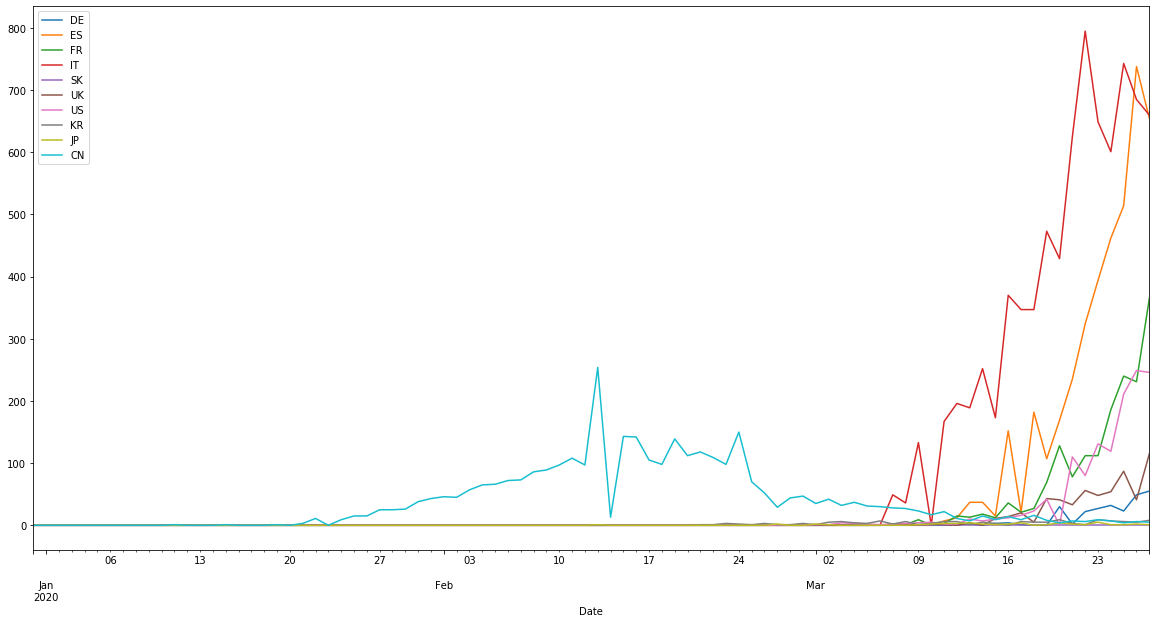

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 10))

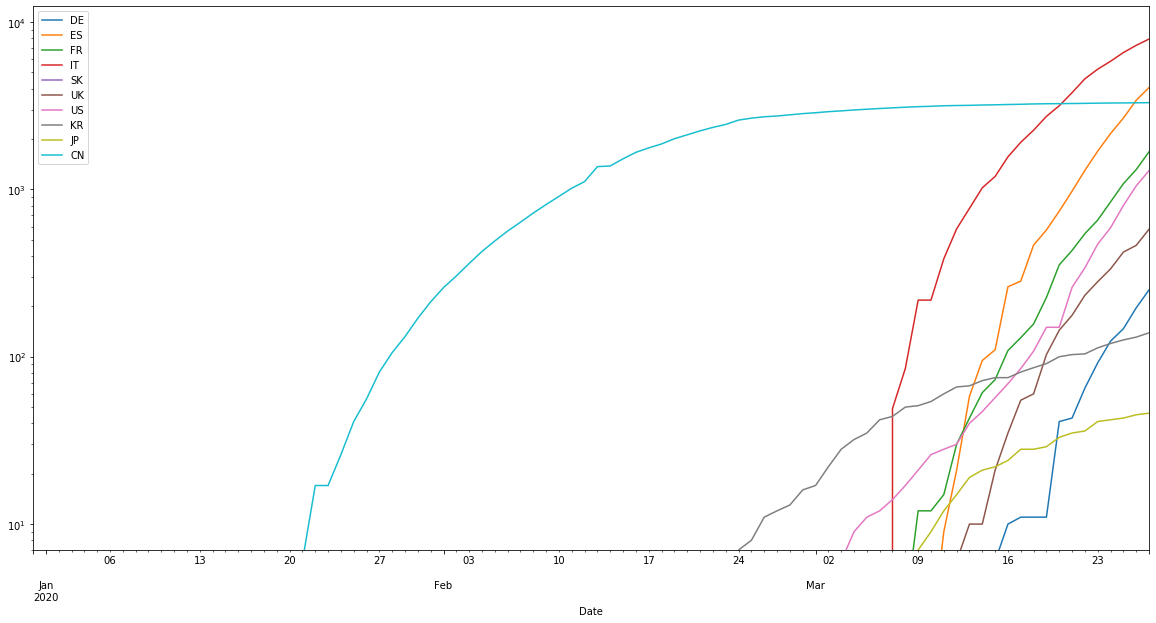

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 10), ylim=(7, None))

In [7]:
cases

,Date,DE,ES,FR,IT,SK,UK,US,KR,JP,CN
87,2019-12-31,0.0,0.0,0.0,0.0,0.0,0,0,0,0,27
86,2020-01-01,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
85,2020-01-02,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
84,2020-01-03,0.0,0.0,0.0,0.0,0.0,0,0,0,0,17
83,2020-01-04,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4,2020-03-23,3311.0,3646.0,1559.0,5560.0,7.0,665,8459,64,43,150
3,2020-03-24,4438.0,4517.0,3838.0,4789.0,6.0,967,11236,76,39,99
2,2020-03-25,2342.0,6584.0,2446.0,5249.0,13.0,1427,8789,100,65,99
1,2020-03-26,4954.0,7937.0,2931.0,5210.0,12.0,1452,13963,104,75,121


In [8]:
sumCases

,DE,ES,FR,IT,SK,UK,US,KR,JP,CN
Date,,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-23,24137.0,27696.0,15309.0,53483.0,185.0,5683.0,35206.0,8961.0,1089.0,81649.0
2020-03-24,28575.0,32213.0,19147.0,58272.0,191.0,6650.0,46442.0,9037.0,1128.0,81748.0
2020-03-25,30917.0,38797.0,21593.0,63521.0,204.0,8077.0,55231.0,9137.0,1193.0,81847.0


In [9]:
deaths

,Date,DE,ES,FR,IT,SK,UK,US,KR,JP,CN
87,2019-12-31,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
86,2020-01-01,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
85,2020-01-02,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
84,2020-01-03,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
83,2020-01-04,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4,2020-03-23,27.0,394.0,112.0,649.0,0.0,48,131,9,5,9
3,2020-03-24,32.0,462.0,186.0,601.0,0.0,54,119,7,1,7
2,2020-03-25,23.0,514.0,240.0,743.0,0.0,87,211,6,1,4
1,2020-03-26,49.0,738.0,231.0,685.0,0.0,41,249,5,2,6


In [10]:
sumDeaths

,DE,ES,FR,IT,SK,UK,US,KR,JP,CN
Date,,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-23,92.0,1694.0,656.0,5230.0,0.0,281.0,471.0,113.0,41.0,3276.0
2020-03-24,124.0,2156.0,842.0,5831.0,0.0,335.0,590.0,120.0,42.0,3283.0
2020-03-25,147.0,2670.0,1082.0,6574.0,0.0,422.0,801.0,126.0,43.0,3287.0
